In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import arviz as az
from sklearn.linear_model import QuantileRegressor
import pymc as pm
import pytensor
import pytensor.tensor as pt
from scipy import stats
import patsy

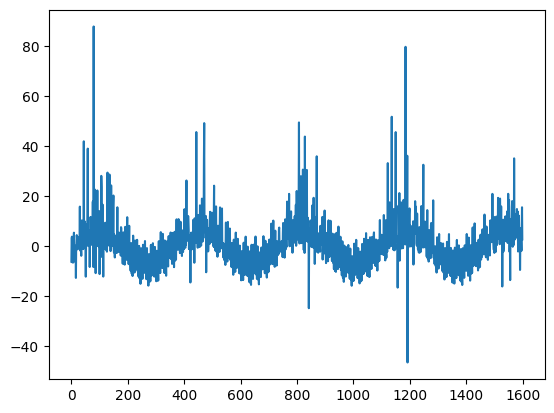

In [132]:
def generate_time_series(t=1000):
    'Generate heteroscedastic time series for an inference problem'

    t = np.arange(0,t)
    np.random.seed(1)
    # Generate a non-stationary time series corresponding to the local m
    weekly = 1.5*np.sin(2*np.pi*t/7)**3 + 5*np.sin(2*np.pi*t/7)**2 + np.sin(2*np.pi*t/7)*0.5
    weekly = weekly - np.mean(weekly)
    monthly = 0.5*np.sin(2*np.pi*t/30 + 10) + 0.8*np.sin(2*np.pi*t/30 + 10)**3
    monthly = monthly - np.mean(monthly)
    yearly  = 4*np.sin(2*np.pi*t/365)
    yearly = yearly - np.mean(yearly)

    
    # Generate a time series with gaussian random walk distribution
    mu = 2*(monthly + weekly + yearly)
    sd = np.exp(weekly*0.5 + monthly)
    y = np.random.normal(mu, scale=0.01)

   
    y = y + np.random.normal(0, scale=np.exp(y*0.2), size=len(t))
    return y


y= generate_time_series(1600)

plt.plot(np.arange(0, len(y)), y)